# Import helper functions + Data

In [1]:
import helpers.qr 
import helpers.wavelet
import helpers.wm
import helpers.plots


#Original data
import numpy as np
#load .npy file
piston = np.load('../data/npy/smallPiston.npy')
injector = np.load('../data/npy/injector.npy')

#Watermark data 
watermark= helpers.qr.qrToArray('../data/qr/qr_code.png')

piston.shape, injector.shape 

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


((207, 232, 232), (60, 60, 60))

In [2]:
piston.max(), piston.min(), injector.max()

(55682, 0, 255)

In [3]:
# Find the min and max values in the array
min_val = np.min(piston)
max_val = np.max(piston)

# Normalize the array to range [0, 1]
normalized_piston = (piston - min_val) / (max_val - min_val)

# Scale the normalized array to range [0, 255]
scaled_piston = normalized_piston * 255


# Now the array 'scaled_piston' contains the normalized array with values in the range [0, 255]
scaled_piston.max()

255.0

In [4]:
piston=scaled_piston
piston.max(), piston.min()

(255.0, 0.0)

## alpha = 0.01, wavelet= haar

In [5]:
# Wavelet to be used
wavelet = 'haar'
# Embed the watermark into the original data with a small alpha value
alpha_value = 0.01
watermarked_coeffs_piston = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet, alpha_value)
watermarked_coeffs_injector = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value)


# Reconstruct the watermarked volume using IDWT
watermarked_data_piston = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston, wavelet)
watermarked_data_injector = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector, wavelet)

# Retrieve the watermark 
retrieved_watermark_piston= helpers.wm.retrieveWm(piston, watermarked_coeffs_piston, wavelet, alpha_value)
retrieved_watermark_injector = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector, wavelet, alpha_value)


In [6]:
#ivy plot data 
helpers.plots.ivyplot(watermarked_data_piston)

C:\Users\moham\anaconda3\envs\thesis\Lib\site-packages\ipyvolume\serialize.py:102: RuntimeWarning: invalid value encountered in cast
  subdata[..., i] = ((gradient[i][zindex] / 2.0 + 0.5) * 255).astype(np.uint8)


Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [7]:
helpers.plots.ivyplot(watermarked_data_injector)

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [8]:
helpers.plots.ivyplotN([watermarked_data_piston,watermarked_data_injector])

GridspecLayout(children=(Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider…

## Alpha =0.1

In [9]:
# Wavelet to be used
wavelet = 'haar'

# Updated alpha value
alpha_0_1 = 0.1

# Embed the watermark into the original data with the updated alpha value
watermarked_coeffs_piston_alpha_0_1 = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet, alpha_0_1)
watermarked_coeffs_injector_alpha_0_1 = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_0_1)

# Reconstruct the watermarked volume using IDWT with the updated alpha value
watermarked_data_piston_alpha_0_1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston_alpha_0_1, wavelet)
watermarked_data_injector_alpha_0_1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector_alpha_0_1, wavelet)

# Retrieve the watermark with the updated alpha value
retrieved_watermark_piston_alpha_0_1 = helpers.wm.retrieveWm(piston, watermarked_coeffs_piston_alpha_0_1, wavelet, alpha_0_1)
retrieved_watermark_injector_alpha_0_1 = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector_alpha_0_1, wavelet, alpha_0_1)


In [10]:
helpers.plots.ivyplotN([watermarked_data_piston,watermarked_data_injector, watermarked_data_piston_alpha_0_1, watermarked_data_injector_alpha_0_1 ])

GridspecLayout(children=(Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider…

## Alpha=1

In [11]:
# Wavelet to be used
wavelet = 'haar'

# Updated alpha value to 1
alpha_1 = 1

# Embed the watermark into the original data with the updated alpha value
watermarked_coeffs_piston_alpha_1 = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet, alpha_1)
watermarked_coeffs_injector_alpha_1 = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_1)

# Reconstruct the watermarked volume using IDWT with the updated alpha value
watermarked_data_piston_alpha_1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston_alpha_1, wavelet)
watermarked_data_injector_alpha_1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector_alpha_1, wavelet)

# Retrieve the watermark with the updated alpha value
retrieved_watermark_piston_alpha_1 = helpers.wm.retrieveWm(piston, watermarked_coeffs_piston_alpha_1, wavelet, alpha_1)
retrieved_watermark_injector_alpha_1 = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector_alpha_1, wavelet, alpha_1)

In [12]:
helpers.plots.ivyplotN([watermarked_data_piston,watermarked_data_injector, 
                        watermarked_data_piston_alpha_0_1, watermarked_data_injector_alpha_0_1,
                        watermarked_data_piston_alpha_1, watermarked_data_injector_alpha_1])

GridspecLayout(children=(Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider…

## Alpha= 0.1 , db1(haar), db20 and db30 implementations then comparaison

In [13]:
# Wavelet to be used
wavelet_db1 = 'db1'
alpha_value=0.1

# Embed the watermark into the original data with a small alpha value
watermarked_coeffs_piston_db1 = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet_db1, alpha_value)
watermarked_coeffs_injector_db1 = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet_db1, alpha_value)

# Reconstruct the watermarked volume using IDWT
watermarked_data_piston_db1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston_db1, wavelet_db1)
watermarked_data_injector_db1 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector_db1, wavelet_db1)

# Retrieve the watermark 
retrieved_watermark_piston_db1 = helpers.wm.retrieveWm(piston, watermarked_coeffs_piston_db1, wavelet_db1, alpha_value)
retrieved_watermark_injector_db1 = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector_db1, wavelet_db1, alpha_value)


In [14]:
# Wavelet to be used
wavelet_db20 = 'db20'

# Embed the watermark into the original data with a small alpha value
watermarked_coeffs_piston_db20 = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet_db20, alpha_value)
watermarked_coeffs_injector_db20 = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet_db20, alpha_value)

# Reconstruct the watermarked volume using IDWT
watermarked_data_piston_db20 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston_db20, wavelet_db20)
watermarked_data_injector_db20 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector_db20, wavelet_db20)

# Retrieve the watermark 
retrieved_watermark_piston_db20 = helpers.wm.retrieveWm(piston, watermarked_coeffs_piston_db20, wavelet_db20, alpha_value)
retrieved_watermark_injector_db20 = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector_db20, wavelet_db20, alpha_value)

In [15]:
# Wavelet to be used
wavelet_db38 = 'db38'

# Embed the watermark into the original data with a small alpha value
watermarked_coeffs_piston_db38 = helpers.wavelet.embedWatermarkAddition(piston, watermark, wavelet_db38, alpha_value)
watermarked_coeffs_injector_db38 = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet_db38, alpha_value)

# Reconstruct the watermarked volume using IDWT
watermarked_data_piston_db38 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_piston_db38, wavelet_db38)
watermarked_data_injector_db38 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs_injector_db38, wavelet_db38)

# Retrieve the watermark 
retrieved_watermark_piston_db38 = helpers.wm.retrieveWm(piston, watermarked_coeffs_piston_db38, wavelet_db38, alpha_value)
retrieved_watermark_injector_db38 = helpers.wm.retrieveWm(injector, watermarked_coeffs_injector_db38, wavelet_db38, alpha_value)

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Reshape watermarked data to match the original dimensions by removing the first row
watermarked_data_piston_db1 = watermarked_data_piston_db1[1:, :, :]
watermarked_data_piston_db20 = watermarked_data_piston_db20[1:, :, :]
watermarked_data_piston_db38 = watermarked_data_piston_db38[1:, :, :]




# Calculate the difference in coefficients
diff_coeffs_piston_db1 = np.abs(piston - watermarked_data_piston_db1)
diff_coeffs_injector_db1 = np.abs(injector - watermarked_data_injector_db1)
diff_coeffs_piston_db20 = np.abs(piston - watermarked_data_piston_db20)
diff_coeffs_injector_db20 = np.abs(injector - watermarked_data_injector_db20)
diff_coeffs_piston_db38 = np.abs(piston - watermarked_data_piston_db38)
diff_coeffs_injector_db38 = np.abs(injector - watermarked_data_injector_db38)



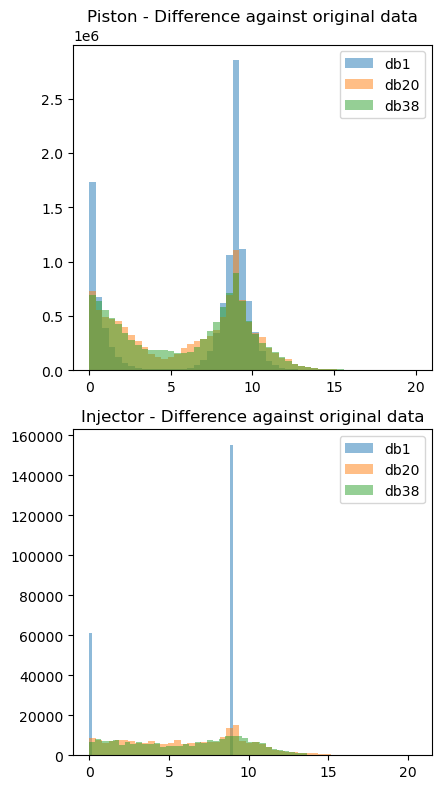

In [17]:
# Plotting
plt.figure(figsize=(12, 8))

# For Piston
plt.subplot(2, 3, 1)
plt.hist(diff_coeffs_piston_db1.flatten(), bins=50, alpha=0.5, label='db1', range=(0, 20))
plt.hist(diff_coeffs_piston_db20.flatten(), bins=50, alpha=0.5, label='db20', range=(0, 20))
plt.hist(diff_coeffs_piston_db38.flatten(), bins=50, alpha=0.5, label='db38', range=(0, 20))
plt.title('Piston - Difference against original data')
plt.legend()

# For Injector
plt.subplot(2, 3, 4)
plt.hist(diff_coeffs_injector_db1.flatten(), bins=50, alpha=0.5, label='db1')
plt.hist(diff_coeffs_injector_db20.flatten(), bins=50, alpha=0.5, label='db20')
plt.hist(diff_coeffs_injector_db38.flatten(), bins=50, alpha=0.5, label='db38')
plt.title('Injector - Difference against original data')
plt.legend()

plt.tight_layout()
plt.show()


## Compare wm retrieval

In [18]:
watermark= helpers.wm.reshapeWm(watermark, (104, 116, 116))
watermark.shape


(104, 116, 116)

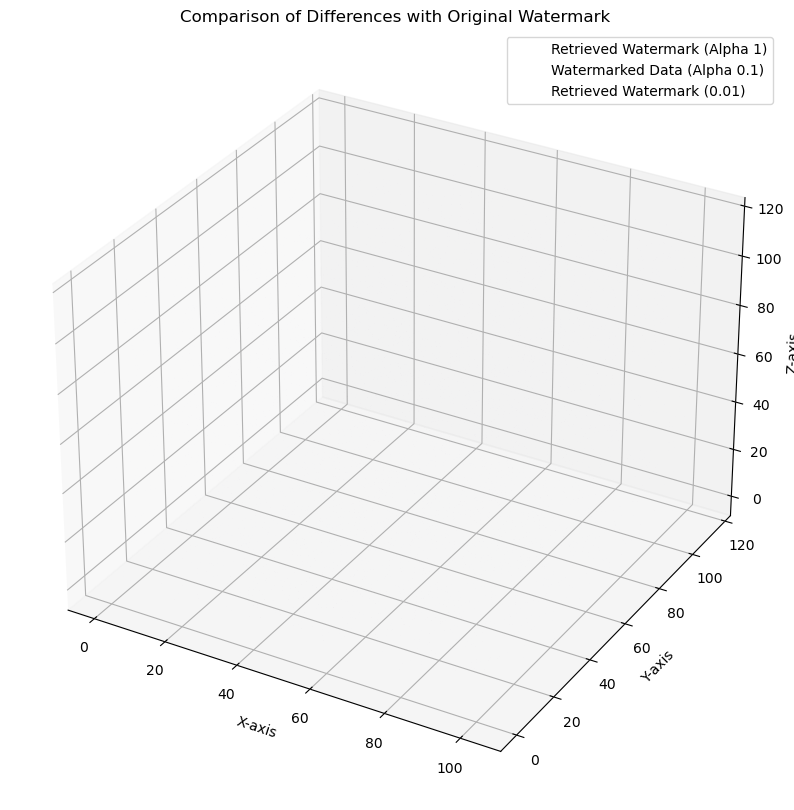

In [19]:
# Creating a single 3D scatter plot for all the differences

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to add scatter plots for each comparison
def add_scatter_plot(array1, array2, color, label):
    difference = np.abs(array1 - array2)
    x, y, z = np.indices(array1.shape)
    diff_flat = difference.flatten()
    x_flat, y_flat, z_flat = x.flatten(), y.flatten(), z.flatten()
    ax.scatter(x_flat, y_flat, z_flat, c=color, s=diff_flat*100, label=label)

# Adding scatter plots for each comparison
add_scatter_plot(watermark, retrieved_watermark_piston_alpha_1, 'red', 'Retrieved Watermark (Alpha 1)')
add_scatter_plot(watermark, retrieved_watermark_piston_alpha_0_1, 'green', 'Watermarked Data (Alpha 0.1)')
add_scatter_plot(watermark, retrieved_watermark_piston, 'blue', 'Retrieved Watermark (0.01)')

# Adding a legend, labels, and title
ax.legend()
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Comparison of Differences with Original Watermark')

plt.show()

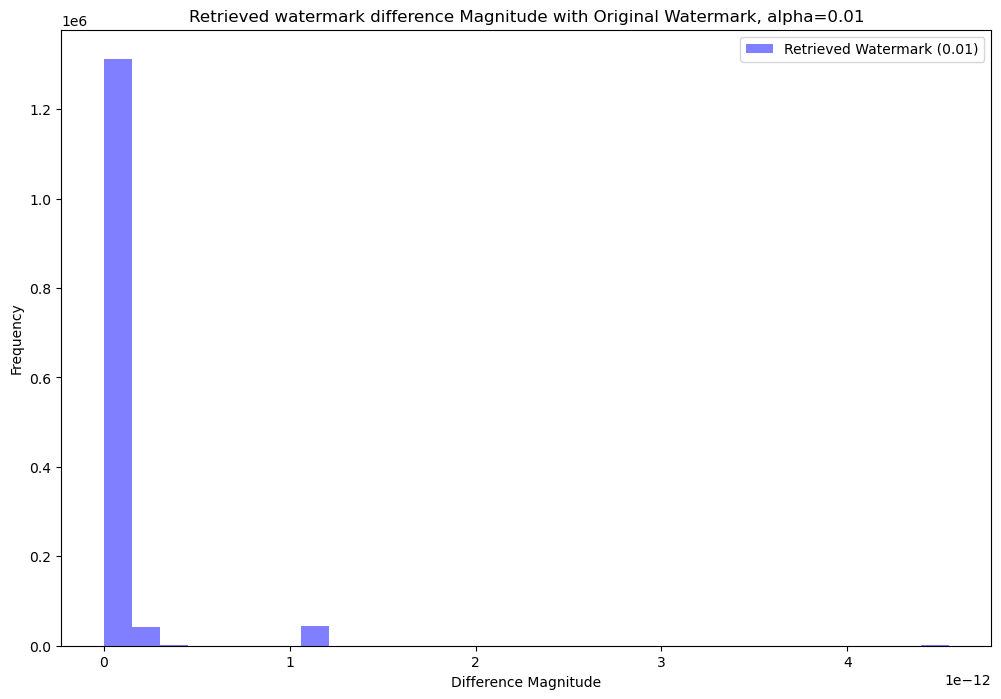

In [20]:
def plot_histograms():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Calculating differences and flattening the arrays
    diff3 = np.abs(watermark - retrieved_watermark_piston).flatten()

    # Plotting histograms
    ax.hist(diff3, bins=30, alpha=0.5, label='Retrieved Watermark (0.01)', color='blue')

    # Adding legend, labels, and title
    ax.legend()
    ax.set_xlabel('Difference Magnitude')
    ax.set_ylabel('Frequency')
    ax.set_title('Retrieved watermark difference Magnitude with Original Watermark, alpha=0.01')

    plt.show()

# Plotting the histograms
plot_histograms()

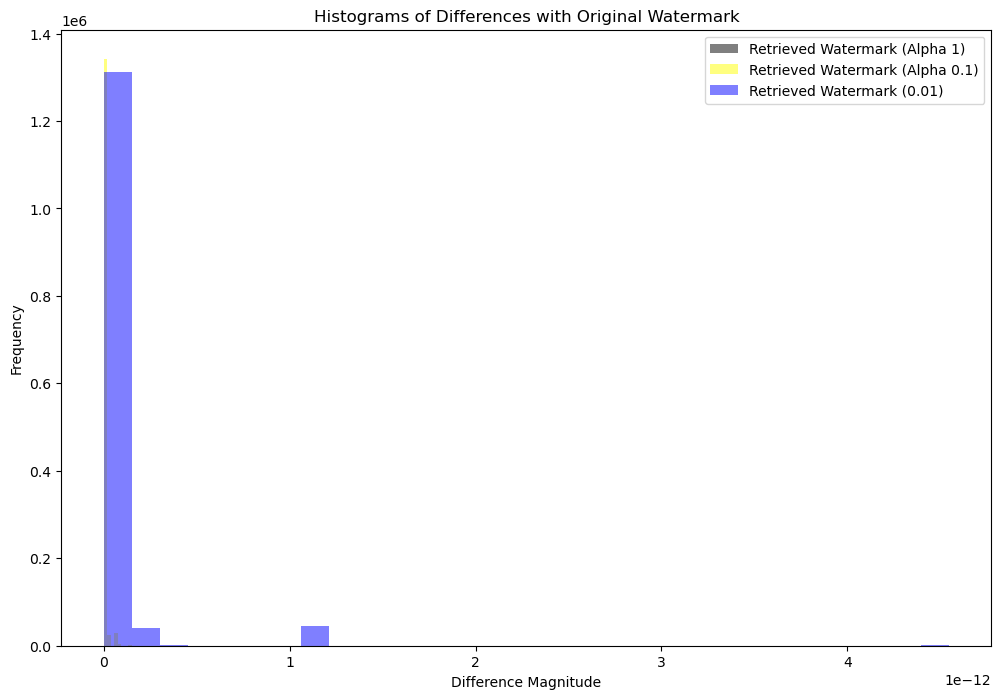

In [21]:
def plot_histograms():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Calculating differences and flattening the arrays
    diff1 = np.abs(watermark - retrieved_watermark_piston_alpha_1).flatten()
    diff2 = np.abs(watermark - retrieved_watermark_piston_alpha_0_1).flatten()
    diff3 = np.abs(watermark - retrieved_watermark_piston).flatten()

    # Plotting histograms
    ax.hist(diff1, bins=30, alpha=0.5, label='Retrieved Watermark (Alpha 1)', color='black')
    ax.hist(diff2, bins=30, alpha=0.5, label='Retrieved Watermark (Alpha 0.1)', color='yellow')
    ax.hist(diff3, bins=30, alpha=0.5, label='Retrieved Watermark (0.01)', color='blue')

    # Adding legend, labels, and title
    ax.legend()
    ax.set_xlabel('Difference Magnitude')
    ax.set_ylabel('Frequency')
    ax.set_title('Histograms of Differences with Original Watermark')

    plt.show()

# Plotting the histograms
plot_histograms()

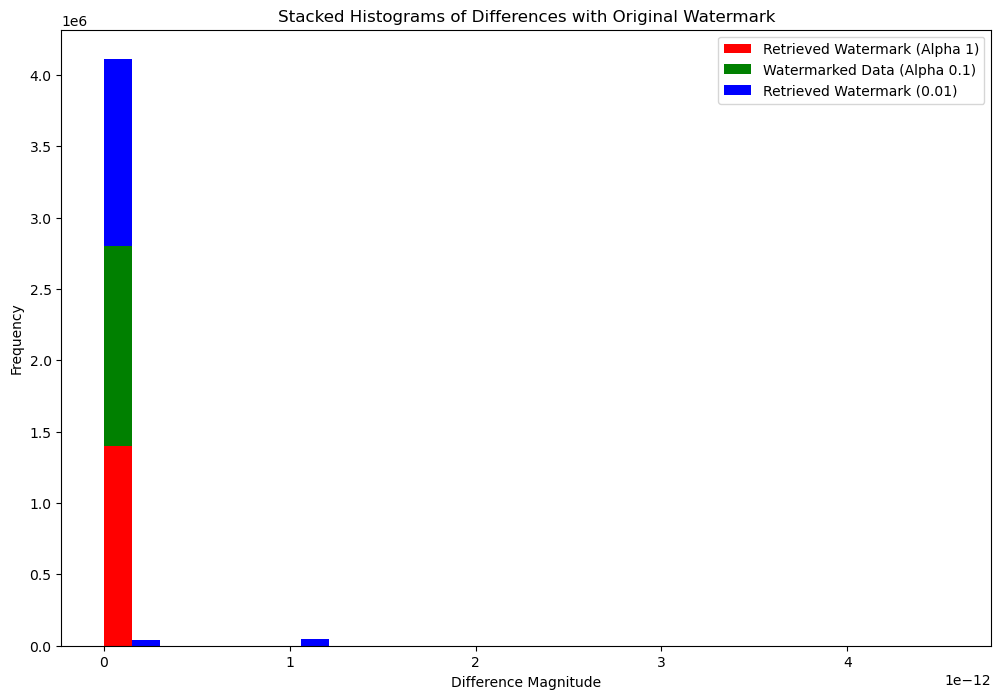

In [22]:
# Modified function to stack histograms
def plot_stacked_histograms():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Calculating differences and flattening the arrays
    diff1 = np.abs(watermark - retrieved_watermark_piston_alpha_1).flatten()
    diff2 = np.abs(watermark - retrieved_watermark_piston_alpha_0_1).flatten()
    diff3 = np.abs(watermark - retrieved_watermark_piston).flatten()

    # Data for stacking
    data = [diff1, diff2, diff3]
    labels = ['Retrieved Watermark (Alpha 1)', 'Watermarked Data (Alpha 0.1)', 'Retrieved Watermark (0.01)']
    colors = ['red', 'green', 'blue']

    # Plotting stacked histograms
    ax.hist(data, bins=30, stacked=True, label=labels, color=colors)

    # Adding legend, labels, and title
    ax.legend()
    ax.set_xlabel('Difference Magnitude')
    ax.set_ylabel('Frequency')
    ax.set_title('Stacked Histograms of Differences with Original Watermark')

    plt.show()

# Plotting the stacked histograms
plot_stacked_histograms()

In [23]:
from scipy.ndimage import zoom


In [24]:
watermark2D= helpers.qr.qrToArray('../data/qr/qr_code.png')
# Desired new size (smaller)
new_size = (116,116) 

# Resize the QR code 
watermark2D = zoom(watermark2D, (new_size[0] / watermark2D.shape[0], new_size[1] / watermark2D.shape[1]), order=0)
watermark2D.shape

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


(116, 116)

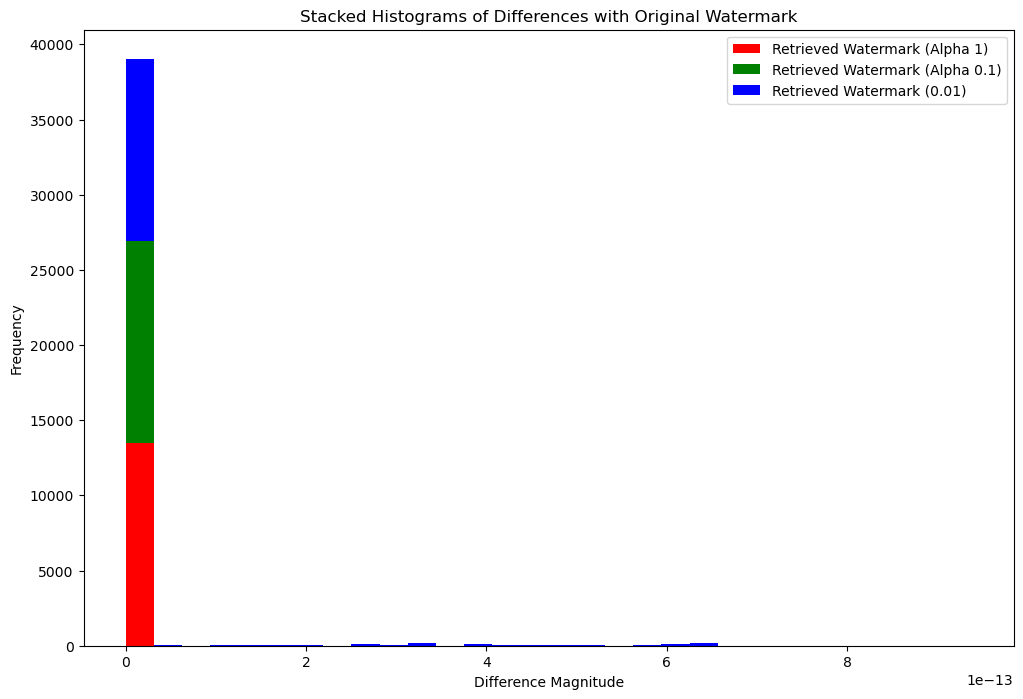

In [25]:
# Averaging the 3D arrays along the first axis (axis=0)
avg_watermark = np.mean(watermark, axis=0)
avg_retrieved_watermark_piston_alpha_1 = np.mean(retrieved_watermark_piston_alpha_1, axis=0)
avg_watermarked_data_piston_alpha_0_1 = np.mean(retrieved_watermark_piston_alpha_0_1, axis=0)
avg_retrieved_watermark_piston_0_01 = np.mean(retrieved_watermark_piston, axis=0)

# Function to plot stacked histograms with averaged data
def plot_stacked_histograms_averaged():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Calculating differences and flattening the arrays
    diff1 = np.abs(watermark2D - avg_retrieved_watermark_piston_alpha_1).flatten()
    diff2 = np.abs(watermark2D - avg_watermarked_data_piston_alpha_0_1).flatten()
    diff3 = np.abs(watermark2D - avg_retrieved_watermark_piston_0_01).flatten()

    # Data for stacking
    data = [diff1, diff2, diff3]
    labels = ['Retrieved Watermark (Alpha 1)', 'Retrieved Watermark (Alpha 0.1)', 'Retrieved Watermark (0.01)']
    colors = ['red', 'green', 'blue']

    # Plotting stacked histograms
    ax.hist(data, bins=30, stacked=True, label=labels, color=colors)

    # Adding legend, labels, and title
    ax.legend()
    ax.set_xlabel('Difference Magnitude')
    ax.set_ylabel('Frequency')
    ax.set_title('Stacked Histograms of Differences with Original Watermark')

    plt.show()

# Plotting the stacked histograms with averaged data
plot_stacked_histograms_averaged()

In [26]:
avg_retrieved_watermark_piston_alpha_1.shape

(116, 116)

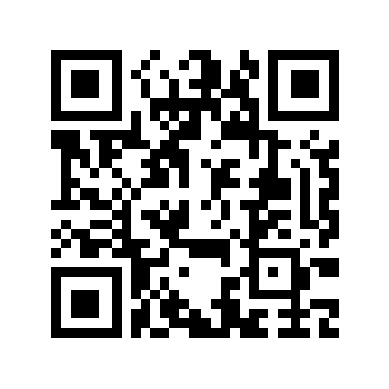

In [27]:
import matplotlib.pyplot as plt



# Plot the NumPy array using Matplotlib
plt.imshow(avg_retrieved_watermark_piston_alpha_1, cmap='gray')  # cmap='gray' for black and white
plt.axis('off')  # Turn off axes

plt.show()

In [28]:
retrieved_watermark_piston_alpha_1.shape

(104, 116, 116)

In [29]:
helpers.plots.test

<function helpers.plots.test()>

In [30]:
#plot wmed data 
helpers.plots.ivyplot(watermarked_data_reconstructed)

NameError: name 'watermarked_data_reconstructed' is not defined

In [ ]:
#plot original vs wm data
annotations={'data1': "original data",
             'data2': "watermarked data",
             'title': "Original vs watermarked data"}
helpers.plots.histogram(data, watermarked_data_reconstructed, annotations)

In [ ]:
helpers.plots.npyplot(retrieved_watermark[0])

In [ ]:
annotations={'data1': "original watermark",
             'data2': "retrieved watermark",
             'title': "Original vs retrieved watermark haar wavelet"}
helpers.plots.histogram(watermark, retrieved_watermark, annotations)

## Implement metrics 

In [ ]:
# Peak signal to noise ratio (PSNR) 
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

In [ ]:
watermarked_data_reconstructed= watermarked_data_reconstructed[1:208]

In [ ]:
psnr_value = peak_signal_noise_ratio(data, watermarked_data_reconstructed)
psnr_value

In [ ]:
data.shape

In [ ]:
watermarked_data_reconstructed.shape

In [ ]:
## SSIM
from skimage.metrics import structural_similarity


In [ ]:
ssim_value = structural_similarity(data, watermarked_data_reconstructed, data_range=data.max() - data.min())
ssim_value

In [ ]:
ssim_dic={}
ssim_dic['haar']=ssim_value

## alpha = 0.01, wavelet= db13

In [ ]:
# Wavelet to be used
wavelet = 'db13'
# Embed the watermark into the original data with a small alpha value
alpha_value = 0.01
watermarked_coeffs = helpers.wavelet.embedWatermarkAddition(data, watermark, wavelet, alpha_value)

# Reconstruct the watermarked volume using IDWT
watermarked_data_db = helpers.wavelet.reconstructWmVolume(watermarked_coeffs, wavelet)

# Retrieve the watermark 
retrieved_watermark_db = helpers.wm.retrieveWm(data, watermarked_coeffs, wavelet, alpha_value)


In [ ]:
watermarked_data_db.shape, data.shape
watermarked_data_db= watermarked_data_db[0:207]

In [ ]:
psnr_valuedb = peak_signal_noise_ratio(data, watermarked_data_db)
psnr_valuedb

In [ ]:
ssim_value = structural_similarity(data, watermarked_data_db, data_range=data.max() - data.min())
ssim_value

In [ ]:
ssim_dic['db13']=ssim_value

In [ ]:

# NCC
ncc = np.sum(data * watermarked_data_db) / (np.linalg.norm(data) * np.linalg.norm(watermarked_data_db))

# Calculate PCNR
correlation = np.sum(data * watermarked_data_db)
max_correlation = np.max(correlation)
noise = watermarked_data_db - data
noise_magnitude = np.linalg.norm(noise)
pcnr = max_correlation / noise_magnitude

'NCC:', ncc, 'PCNR:', pcnr


In [ ]:
ncc_dic

In [ ]:
#plot wmed data 
helpers.plots.ivyplot(watermarked_data_db)

## Alpha=0.01 wavelet= db 4

In [ ]:
# Wavelet to be used
wavelet = 'db4'
# Embed the watermark into the original data with a small alpha value
alpha_value = 0.01
watermarked_coeffs = helpers.wavelet.embedWatermarkAddition(data, watermark, wavelet, alpha_value)

# Reconstruct the watermarked volume using IDWT
watermarked_data_db4 = helpers.wavelet.reconstructWmVolume(watermarked_coeffs, wavelet)

# Retrieve the watermark 
retrieved_watermark_db4 = helpers.wm.retrieveWm(data, watermarked_coeffs, wavelet, alpha_value)


In [ ]:
watermarked_data_db4.shape, data.shape
watermarked_data_db4= watermarked_data_db4[1:]
watermarked_data_db4.shape, data.shape


In [ ]:
psnr_valuedb = peak_signal_noise_ratio(data, watermarked_data_db4)
psnr_valuedb

In [ ]:
ssim_value = structural_similarity(data, watermarked_data_db4, data_range=data.max() - data.min())
ssim_value

In [ ]:
ssim_dic['db4']=ssim_value

In [ ]:

# NCC
ncc = np.sum(data * watermarked_data_db4) / (np.linalg.norm(data) * np.linalg.norm(watermarked_data_db4))

# Calculate PCNR
correlation = np.sum(data * watermarked_data_db4)
max_correlation = np.max(correlation)
noise = watermarked_data_db4 - data
noise_magnitude = np.linalg.norm(noise)
pcnr = max_correlation / noise_magnitude

'NCC:', ncc, 'PCNR:', pcnr


In [ ]:
('NCC:', 0.9999999856918268, 'PCNR:', 79951268542.49179)


In [ ]:
import pywt
pywt.wavelist()

## Plot SSIM dict

In [ ]:
wavelet = list(ssim_dic.keys())
SSIM = list(ssim_dic.values())

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.barh(wavelet, SSIM)  # Use plt.bar for vertical bars, plt.barh for horizontal bars
plt.xlabel('SSIM')  # Label for the X-axis
plt.ylabel('wavelet')    # Label for the Y-axis
plt.title('SSIM Value per wavelet type')  # Title for the plot